In [ ]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df=pd.read_csv("/content/KAG_conversion_data.csv")

In [ ]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


**Checking for null values**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [ ]:
df.shape

(1143, 11)

In [ ]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

**Correlation Matrix**

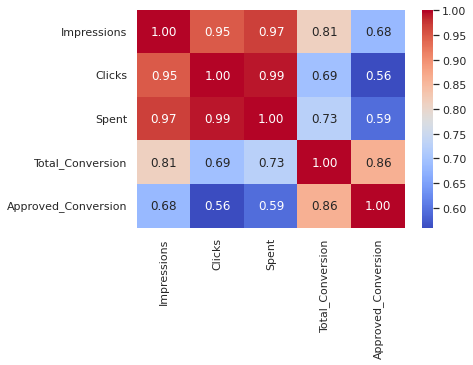

In [ ]:
g=sns.heatmap(df[["Impressions","Clicks","Spent","Total_Conversion","Approved_Conversion"]].corr(),annot=True ,fmt=".2f", cmap="coolwarm")

Here it's clear, "Impressions" and "Total_Conversion" are more correlated with "Approved_Conversion" than "Clicks" and "Spent". 

In [ ]:
df["xyz_campaign_id"].unique()

array([ 916,  936, 1178])

replace the names with campaign_a, campaign_b and campaign_c for better visualisation which creates problem with integer values.

In [ ]:
df["xyz_campaign_id"].replace({916:"campaign_a",936:"campaign_b",1178:"campaign_c"}, inplace=True)

In [ ]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,campaign_a,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,campaign_a,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,campaign_a,103920,30-34,M,20,693,0,0.00,1,0
3,708815,campaign_a,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,campaign_a,103928,30-34,M,28,4133,1,1.29,1,1


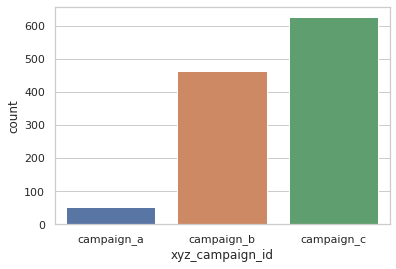

In [ ]:
# count plot on single categorical variable 
sns.countplot(x ='xyz_campaign_id', data = df) 
# Show the plot 
plt.show() 

This shows campaign_c has more number of ads.

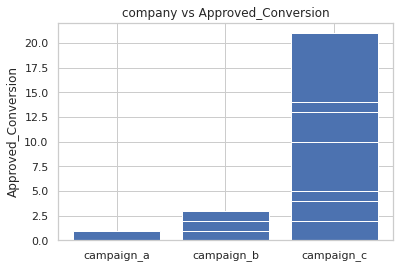

In [ ]:
#Approved_Conversion
# Creating our bar plot
plt.bar(df["xyz_campaign_id"], df["Approved_Conversion"])
plt.ylabel("Approved_Conversion")
plt.title("company vs Approved_Conversion")
plt.show()

It's clear from both the above graphs that compaign_c has better Approved_conversion count, i.e. most people bought products in campaign_c.

Let's see the distribution with age.

**Age**

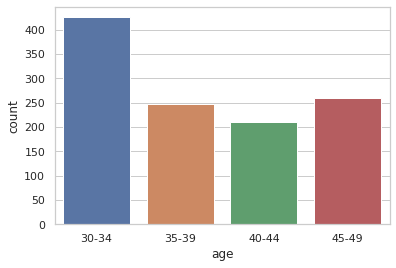

In [ ]:
# count plot on single categorical variable 
sns.countplot(x ='age', data = df) 
# Show the plot 
plt.show() 

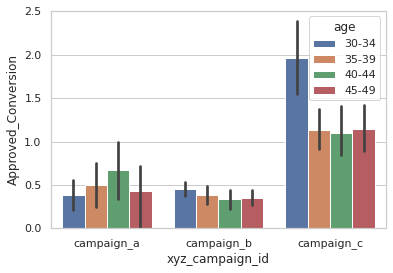

In [ ]:
import seaborn as sns
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
sns.barplot(x=df["xyz_campaign_id"], y=df["Approved_Conversion"], hue=df["age"], data=tips)

Note that  in campaign_c and campaign_b, the age group of 30-34 shows more interest, whereas in campaign_a the age group of 40-44 shows more interest.

**Gender**

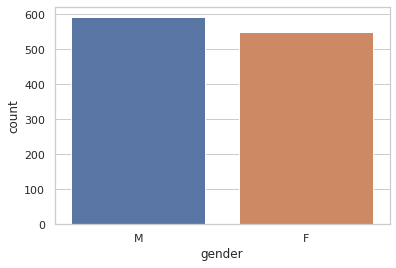

In [ ]:
# count plot on single categorical variable 
sns.countplot(x ='gender', data = df) 
# Show the plot 
plt.show() 

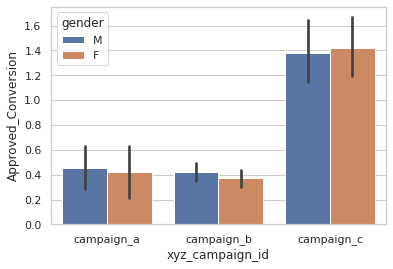

In [ ]:
import seaborn as sns
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
sns.barplot(x=df["xyz_campaign_id"], y=df["Approved_Conversion"], hue=df["gender"], data=tips)

Both the genders shows similar interests in all three campaigns.

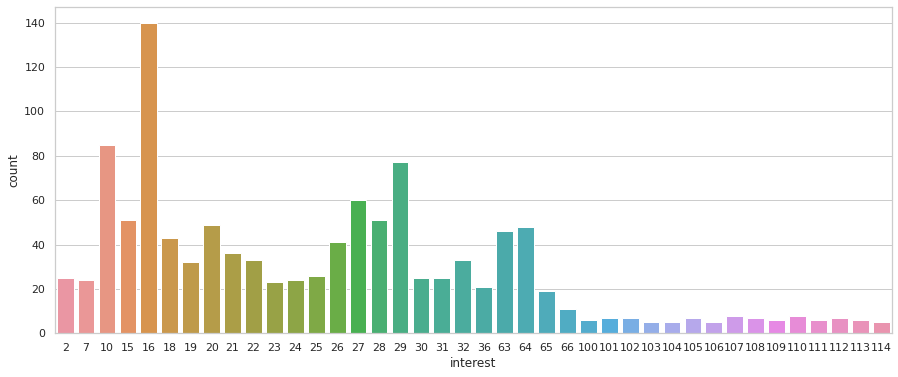

In [ ]:
# count plot on single categorical variable 
fig_dims = (15,6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x ='interest', data = df) 
# Show the plot 
plt.show() 

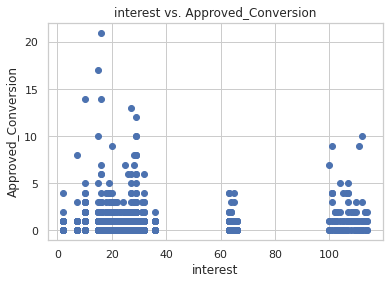

In [ ]:
plt.scatter(df["interest"], df["Approved_Conversion"])
plt.title("interest vs. Approved_Conversion")
plt.xlabel("interest")
plt.ylabel("Approved_Conversion")
plt.show()

Note that, although the count of interest after 100 is less,there is a rise of users after 100 who actually bought the product. Rest of the distribution is according to what was expected.

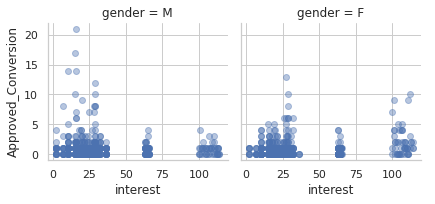

In [ ]:
g = sns.FacetGrid(df, col="gender")
g.map(plt.scatter, "interest", "Approved_Conversion", alpha=.4)
g.add_legend();

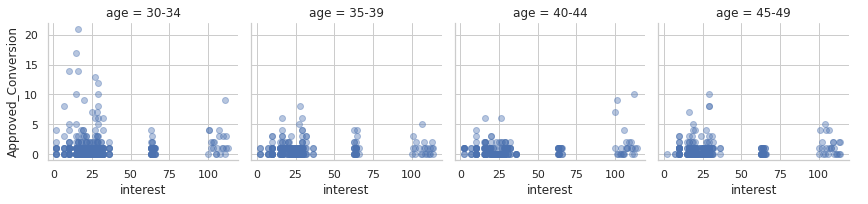

In [ ]:
g = sns.FacetGrid(df, col="age")
g.map(plt.scatter, "interest", "Approved_Conversion", alpha=.4)
g.add_legend();

**Spent**

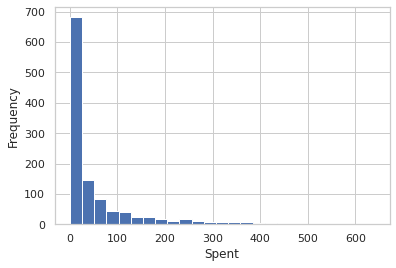

In [ ]:
plt.hist(df['Spent'], bins = 25)
plt.xlabel("Spent")
plt.ylabel("Frequency")
plt.show()

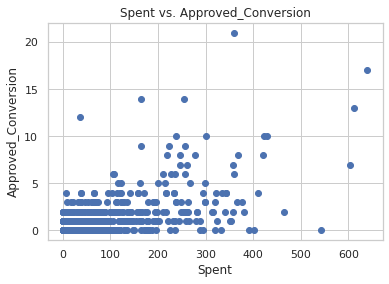

In [ ]:
plt.scatter(df["Spent"], df["Approved_Conversion"])
plt.title("Spent vs. Approved_Conversion")
plt.xlabel("Spent")
plt.ylabel("Approved_Conversion")
plt.show()

We can see, as the amount of money spent increases, no of product bought increases.

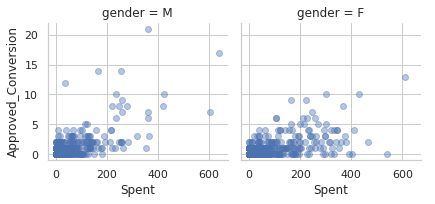

In [ ]:
g = sns.FacetGrid(df, col="gender")
g.map(plt.scatter, "Spent", "Approved_Conversion", alpha=.4)
g.add_legend();

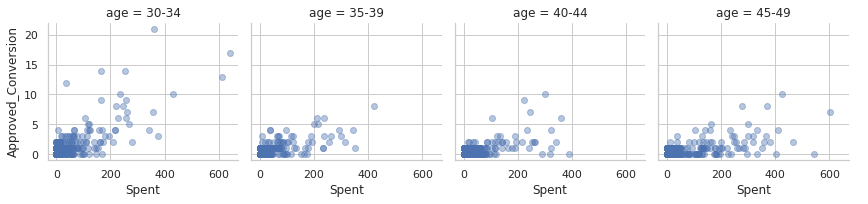

In [ ]:
g = sns.FacetGrid(df, col="age")
g.map(plt.scatter, "Spent", "Approved_Conversion", alpha=.4)
g.add_legend();

**Impressions**

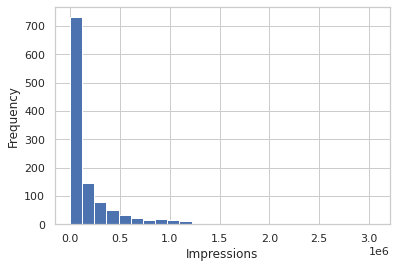

In [ ]:
plt.hist(df['Impressions'], bins = 25)
plt.xlabel("Impressions")
plt.ylabel("Frequency")
plt.show()

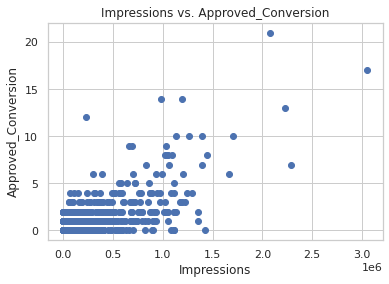

In [ ]:
plt.scatter(df["Impressions"], df["Approved_Conversion"])
plt.title("Impressions vs. Approved_Conversion")
plt.xlabel("Impressions")
plt.ylabel("Approved_Conversion")
plt.show()

There is a sudden rise in Approved conversions after a certain point in Impressions.

Let's see people who actually went from clicking to buying the product.

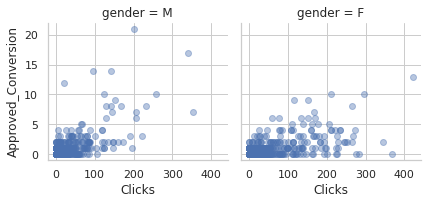

In [ ]:
g = sns.FacetGrid(df, col="gender")
g.map(plt.scatter, "Clicks", "Approved_Conversion", alpha=.4)
g.add_legend();

It seems men tend to click more than women but women buy more products than men after clicking the add.

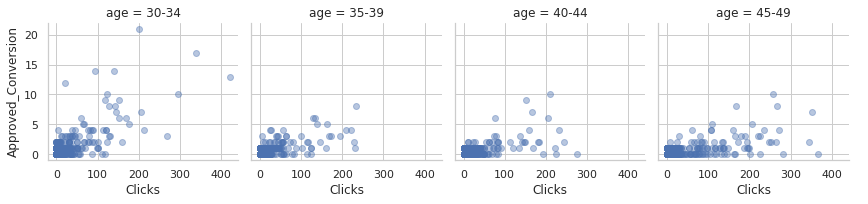

In [ ]:
g = sns.FacetGrid(df, col="age")
g.map(plt.scatter, "Clicks", "Approved_Conversion", alpha=.4)
g.add_legend();

People in age group 30-34 has more tendency to buy product after clicking the add.

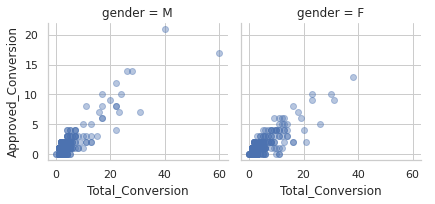

In [ ]:
g = sns.FacetGrid(df, col="gender")
g.map(plt.scatter, "Total_Conversion", "Approved_Conversion", alpha=.4)
g.add_legend();

It seems women buys more products than men after enquiring the product. However men tends to enquire more about the product.

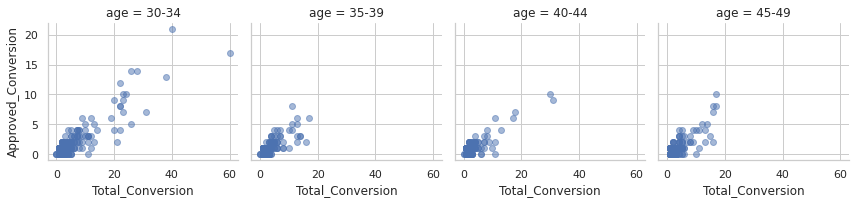

In [ ]:
g = sns.FacetGrid(df, col="age")
g.map(plt.scatter, "Total_Conversion", "Approved_Conversion",alpha=.5)
g.add_legend()

It seems people in age group 30-34 are more likely to buy the product after enquiring the product.

In [ ]:
a=[]
b=[]
c=[]
for i,j,k in zip(df.xyz_campaign_id, df.fb_campaign_id, df.Approved_Conversion):
    if i=="campaign_c":
      a.append(i),b.append(j),c.append(k)

In [ ]:
d={'campaign_name':a, 'fb_campaign_id':b, 'Approved_Conversion':c}     
campaign_c=pd.DataFrame(d)
campaign_c.head()

,campaign_name,fb_campaign_id,Approved_Conversion
0,campaign_c,144531,14
1,campaign_c,144531,5
2,campaign_c,144531,1
3,campaign_c,144531,2
4,campaign_c,144531,2


**Distribution of fb_campaign_id with Approved_Conversion for campaign_c**

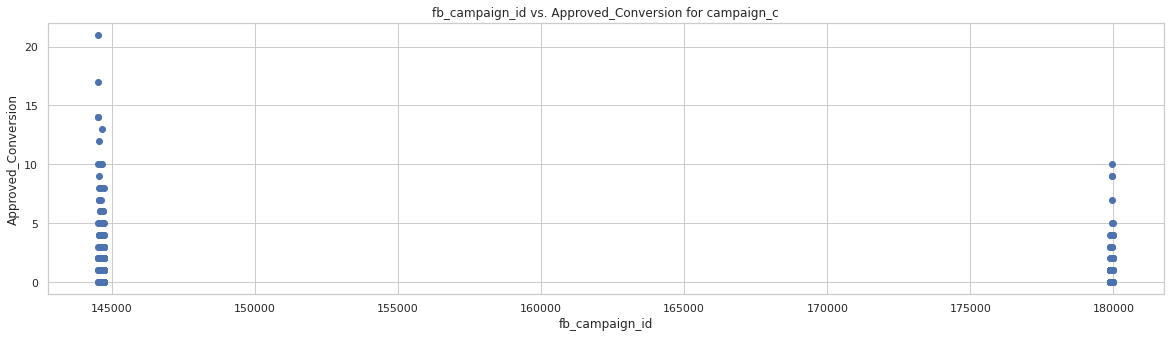

In [ ]:
plt.figure(figsize=(20,5))
plt.scatter(campaign_c["fb_campaign_id"], campaign_c["Approved_Conversion"])
plt.title("fb_campaign_id vs. Approved_Conversion for campaign_c")
plt.xlabel("fb_campaign_id")
plt.ylabel("Approved_Conversion")
plt.show()

We can see fb_campaign_ids around 145000 have more Approved_Conversion than around 180000 for campaign_c

# **Summary**

**(Just for reminder : (916,  936, 1178) xyz_campaign_ids were replaced by campaign_a, campaign_b and campaign_c)**

**Correlations:**
-->"Impressions" and "Total_Conversion" are more correlated with "Approved_Conversion" than "Clicks" and "Spent".

**Campaign_C:**
-->campaign_c has most number of ads.
-->compaign_c has better Approved_conversion count, i.e. most people bought products in campaign_c.

**age_group:**
-->In campaign_c and campaign_b, the age group of 30-34 shows more interest, whereas in campaign_a the age group of 40-44 shows more interest.

**gender:**
-->Both the genders shows similar interests in all three campaigns.

**interest:**
-->Although the count of interest after 100 is less,there is a rise of users after 100 who actually bought the product. Rest of the distribution is according to what was expected.

**money spent:**
-->As the amount of money spent increases, no of product bought increases.
There is a sudden rise in the Approved_Conversion after a certain point in Impressions.

**Product bought after clicking the ad:**
-->It seems men tend to click more than women but women buy more products than men after clicking the add.
People in age group 30-34 has more tendency to buy product after clicking the add.

**Product bought after enquiring the ad:**
-->It seems women buys more products than men after enquiring the product. However men tends to enquire more about the product.
-->It seems people in age group 30-34 are more likely to buy the product after enquiring the product.

**Instructive_conclusion:**

-->For campaign_c, fb_campaign_ids around 145000 have more Approved_Conversion than around 180000



**Towards Business Questions**

**1)How to improve the social ad campaigns for the highest conversion rate possible.**

**=>** Since highest conversion rate was attained in campaign_c, we can consider the factors contributed in this campaign:

*-->The number of ad counts should be more for better reach.

*-->The age group of 30-34 should be the main aim.

*-->People with interest types after 100 should be given more attention.

*-->More the number of times the add is shown that means "impression", more approved_conversion rate is achieved.

**2)Finding the perfect target demographics with the appropriate clickthrough rates**

* Women tend to buy the product more often after clicking the ad than men.
* Also the age group 30 to 34 buy the product more often after clicking the ad.

**3)Comparing the individual campaign performance so the best creative/campaign can be run again with adjusted audiences.**

* clearly campaign_c wins the battle due to highest approved_conversion rate.
* Also campaign_a does pretty well , considering the number of ads it involves. With less no of ads, it has managed to peform better than campaign_b with large no of ads.

**Replacing xyz_campaign_ids again with actual ids for modelling**

In [ ]:
df["xyz_campaign_id"].replace({"campaign_a":916 ,"campaign_b":936 ,"campaign_c":1178}, inplace=True)

**Encoding the Labels 'gender' and 'age' for better modelling**

In [ ]:
#encoding gender
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoder.fit(df["gender"])
df["gender"]=encoder.transform(df["gender"])
print(df["gender"])

0       1
1       1
2       1
3       1
4       1
       ..
1138    0
1139    0
1140    0
1141    0
1142    0
Name: gender, Length: 1143, dtype: int64


In [ ]:
#encoding age
encoder.fit(df["age"])
df["age"]=encoder.transform(df["age"])
print(df["age"])

0       0
1       0
2       0
3       0
4       0
       ..
1138    3
1139    3
1140    3
1141    3
1142    3
Name: age, Length: 1143, dtype: int64


In [ ]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,0,1,15,7350,1,1.43,2,1
1,708749,916,103917,0,1,16,17861,2,1.82,2,0
2,708771,916,103920,0,1,20,693,0,0.00,1,0
3,708815,916,103928,0,1,28,4259,1,1.25,1,0
4,708818,916,103928,0,1,28,4133,1,1.29,1,1


**Removing "Approved_Conversion" and "Total_Conversion" from dataset**

In [ ]:
import numpy as np
x=np.array(df.drop(labels=["Approved_Conversion","Total_Conversion"], axis=1))
y=np.array(df["Total_Conversion"])

In [ ]:
x

array([[7.08746000e+05, 9.16000000e+02, 1.03916000e+05, ...,
        7.35000000e+03, 1.00000000e+00, 1.42999995e+00],
       [7.08749000e+05, 9.16000000e+02, 1.03917000e+05, ...,
        1.78610000e+04, 2.00000000e+00, 1.82000002e+00],
       [7.08771000e+05, 9.16000000e+02, 1.03920000e+05, ...,
        6.93000000e+02, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.31441200e+06, 1.17800000e+03, 1.79979000e+05, ...,
        1.51531000e+05, 2.80000000e+01, 4.02899995e+01],
       [1.31441400e+06, 1.17800000e+03, 1.79981000e+05, ...,
        7.90253000e+05, 1.35000000e+02, 1.98710000e+02],
       [1.31441500e+06, 1.17800000e+03, 1.79982000e+05, ...,
        5.13161000e+05, 1.14000000e+02, 1.65609999e+02]])

In [ ]:
y

array([2, 2, 1, ..., 2, 8, 5])

In [ ]:
y=y.reshape(len(y),1)
y

array([[2],
       [2],
       [1],
       ...,
       [2],
       [8],
       [5]])

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
x = sc_x.fit_transform(x)

**splitting Data into testset and trainset**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

# **Random Forest Regressor to predict Total_Conversion**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 10, random_state = 0)
rfr.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

**Predicting Total Conversion in test_set and rounding up values**

In [ ]:
y_pred=rfr.predict(x_test)
y_pred=np.round(y_pred)

In [ ]:
y_pred

array([ 1.,  3.,  1.,  2.,  1.,  2.,  1.,  1.,  1.,  1.,  2.,  9.,  2.,
        2.,  3.,  1.,  1.,  2.,  1.,  2., 18.,  3.,  1.,  3.,  1.,  1.,
        2.,  1.,  1.,  1.,  2.,  1.,  1.,  2.,  1.,  1.,  1.,  2.,  2.,
        1.,  1.,  1.,  1.,  2.,  8.,  1.,  1.,  2.,  1., 13.,  4.,  1.,
        1.,  3.,  2.,  1.,  4.,  4.,  2.,  2.,  1.,  4.,  1.,  1.,  3.,
        1.,  1.,  4.,  1.,  1.,  1.,  1.,  2.,  2.,  1.,  1.,  2.,  1.,
        1.,  1.,  2.,  2.,  1.,  4.,  1.,  2., 11.,  2., 26.,  1.,  1.,
        2.,  4.,  3.,  1.,  1.,  7.,  2.,  1.,  1.,  4.,  2.,  1.,  2.,
        1.,  1.,  1.,  1.,  2.,  1.,  3.,  1.,  1.,  2.,  1.,  1.,  1.,
        1.,  2.,  1.,  4.,  1.,  1.,  1., 16.,  7.,  2.,  1.,  5.,  1.,
        2.,  1.,  3.,  1.,  1.,  1.,  2.,  1.,  2.,  9.,  1.,  1.,  1.,
        2.,  1.,  2.,  1.,  2.,  2.,  3.,  1.,  1.,  1.,  1.,  1., 22.,
        4.,  3.,  3.,  3.,  1.,  3.,  1.,  1.,  1.,  6.,  2.,  3.,  1.,
        1.,  3., 22.,  6.,  6.,  1.,  2.,  1.,  1.,  1., 11.,  1

# **Evaluation**

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
mae=mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
r2_score=r2_score(y_test, y_pred)


In [ ]:
mae

0.9912663755458515

The mean absolute error achieved is 0.99.

1.   List item
2.   List item



we have got 0.753 of R-squared value which means 75.3% of the data fits the regression model.

In [ ]:
#R-squred value
r2_score

0.7530816415210646

In [ ]:
# LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set:{.2f}'.format(logreg.score(x_test,y_test)))

Accuracy of logistic regression classifier on test set:0.62


In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
mae=mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
r2_score=r2_score(y_test, y_pred)
mae

1.3013100436681222

In [ ]:
r2_score

0.5181967925462574

In [ ]:
# DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5589519650655022


In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
mae=mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
r2_score=r2_score(y_test, y_pred)
mae

1.3930131004366813

In [ ]:
r2_score

0.3846711197792979

In [ ]:
# KNN - KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=4)
classifier.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
mae=mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
r2_score=r2_score(y_test, y_pred)
mae

1.1004366812227073

In [ ]:
r2_score

0.5723475853148337

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
predict_array= knn.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, predict_array))

Accuracy: 0.5982532751091703


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [ ]:
# NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.4366812227074236


In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
mae=mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
r2_score=r2_score(y_test, y_pred)
mae

5.283842794759825

In [ ]:
r2_score

-2.9257010620774686